# Comparing Tumors to Cell Line Archetypes

After batch correcting and combining tumor and cell line data using `Cell-line-tumor-batch-correction-and-clustering.Rmd`, we can compare the original cell line archetypes with this merged dataset, or with just the batch corrected tumor data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140


Read in the original cell line archetypes.

In [ ]:
arc = pd.read_csv('../../data/bulk-rna-seq/arc_gene_space_no_lowgenes.csv', header = None, index_col = None)
arc_genes = pd.read_csv('../../data/bulk-rna-seq/geneNames_wo_lowgenes.csv', header = None, index_col = None)
arc.columns = arc_genes[0]
arc = arc.T
arc.columns = ['SCLC-Y','SCLC-P','SCLC-N', 'SCLC-A2', 'SCLC-A']
arc.head()

SCLC-Y    SCLC-P    SCLC-N   SCLC-A2    SCLC-A
0                                                       
A1BG    3.639489  1.927857  4.448826  3.321331  4.151298
A1CF    0.218535  0.690655  0.011054  0.600117 -0.178952
A2M     0.915044  0.403488  0.262599  0.418040  0.058488
A2ML1   0.145542  0.073408  0.025584  0.033519  0.096227
A4GALT  3.311321  0.334271  1.159494  1.775815  0.996153

In [4]:
data = pd.read_csv('../../data/bulk-rna-seq/CCLE_Minna_Thomas_COMBAT.csv', header = 0, index_col = 0)

In [95]:
data.head()

m.DMS153  m.NCIH60  m.NCIH69  m.NCIH82  m.NCIH128  m.NCIH146  \
A1BG    2.955199  3.239727  3.599770  3.055231   4.579507   4.685081   
A2M     2.267502  0.122302  0.085891  1.586479   0.064500   0.231189   
A2ML1   0.011011 -0.007241 -0.005086 -0.004471  -0.003819   0.011107   
A4GALT  2.453512  1.528297  1.428711  0.359365   0.865621   0.867495   
AAAS    4.693518  5.889316  6.002266  5.981354   5.222291   5.918843   

        m.NCIH187  m.NCIH209  m.NCIH211  m.NCIH250  ...  t.S02351  t.S02352  \
A1BG     3.215947   4.181752   1.288835   4.804468  ...  4.425944  4.509551   
A2M      0.059062   0.072303   0.189474   0.066101  ... -0.005748  0.488921   
A2ML1   -0.003497  -0.003431  -0.004644  -0.003914  ...  0.016744  0.082622   
A4GALT   2.455182   1.037618   0.265048   3.132071  ...  2.174654  2.124551   
AAAS     5.449847   4.683530   5.295229   5.385758  ...  5.686108  5.494941   

        t.S02353  t.S02354  t.S02360  t.S02375  t.S02376  t.S02378  t.S02382  \
A1BG    5.541185  4.783102  4.341475  2.709941  2.445574  3.553248  3.220695   
A2M     0.375093  0.353537 -0.121541  0.037507 -0.098634  0.733257  0.428722   
A2ML1   0.016744  0.016744  0.016744  0.016744  0.016744  0.048176  0.016744   
A4GALT  2.616897  1.749311  1.418615  1.974879  0.835538  2.568664  2.344562   
AAAS    6.057227  5.867608  5.781424  5.723227  5.066145  5.165282  5.823753   

        t.S02397  
A1BG    3.186316  
A2M     0.395575  
A2ML1   0.016744  
A4GALT  0.594535  
AAAS    5.439027  

[5 rows x 201 columns]

In [5]:
arc = arc.loc[set(arc.index).intersection(set(data.index))].sort_index()

## Apply signature matrix to tumor data

First, we'll try applying the bulk signature scores from the cell lines to the tumor data itself, to see how well they correlate. 

In [8]:
sig = pd.read_csv('../../data/bulk-rna-seq/sig_matrix_ParTI.csv', index_col=0, header = 0)

In [9]:
data_small = data.loc[set(sig.index).intersection(set(data.index))]

In [23]:

gene_sig = sig.loc[sig.index.isin(data_small.index)]
if np.all(np.linalg.norm(gene_sig, axis = 0) != 1-0.001):
    gene_sig = gene_sig / np.linalg.norm(gene_sig, axis=0)
lanorm = np.linalg.norm(data_small, axis=1)
tumorx = (data_small.T / np.linalg.norm(data_small, axis=1)).T
df = pd.DataFrame(tumorx, columns=data_small.columns, index=data_small.index)    
df_inv, resid, rank, sing_values = np.linalg.lstsq(gene_sig, np.array(df))
out = pd.DataFrame(df_inv.T)

/var/folders/qg/8dr16mq572j_ksgn8_d2g59h0000gn/T/ipykernel_10712/301027040.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  df_inv, resid, rank, sing_values = np.linalg.lstsq(gene_sig, np.array(df))


In [46]:
out.index = data_small.columns
out.head()

0         1         2         3         4
m.DMS153   0.111343  0.003853  0.216319  0.135318  0.195491
m.NCIH60  -0.067751  0.336309  0.159676  0.177875  0.038608
m.NCIH69  -0.025600  0.203966  0.185767  0.152071  0.075843
m.NCIH82   0.073043  0.105822  0.206023  0.213329  0.022870
m.NCIH128 -0.020213  0.088232  0.266176  0.076650  0.107937

# Plot PCA of Combined Dataset and archetypes on top of plot

We can also try plotting a PCA of the combined dataset, and then transforming the archetypes with the same PCA and looking at how the tumor data relates to the archetypes.

In [30]:
from sklearn.decomposition import PCA

#fit a PCA to the combined data
pca = PCA(n_components=20)
data_pca = pca.fit_transform(data.T)
pca_df = pd.DataFrame(data_pca)

In [35]:
source = []
for d in data.columns:
    tmp = d.split('.')[0]
    if tmp == 'm': source.append('Minna')
    elif tmp == 'c': source.append("CCLE")
    elif tmp == 't': source.append('Tumor')

Transform the archetypes using the same PCA, and overlay on a plot of the combined dataset.

In [101]:
arc_pca_df

0          1          2          3          4          5   \
0  105.141125  20.523526 -31.055526   4.222652 -44.867790  17.789345   
1   67.753673   5.639202  38.793917  11.283025  48.726942   0.632393   
2   13.480949 -61.382710  -9.747119 -36.090952  -2.277275  -3.393219   
3  -15.742720  63.621360   6.765774 -19.045107   2.678183  -2.649270   
4  -30.515648 -16.401755  -4.213596  26.551084  -6.264070   3.296101   

          6          7          8         9          10        11        12  \
0  15.761299 -15.090053  12.496716  9.784869 -18.579085 -1.976168 -2.534957   
1   0.021840  -8.426779  -6.310661 -0.625439  -5.293422 -9.166628  5.826282   
2  -4.070640   4.935532  -1.570710  1.841773   0.340401 -2.074361  0.812158   
3  -5.129095   0.010443   1.814190  0.962918   1.440887 -5.068677 -0.021851   
4   4.335677   3.134829  -1.935130 -0.682480   1.820513  4.387722  1.014748   

         13        14        15        16        17        18         19  
0  4.466843 -1.138633  5.489561 -3.567262  0.992877 -2.656230   5.994807  
1 -2.349351  1.284963  5.302823 -6.131248 -1.938907 -3.819314  10.100513  
2 -1.248821 -1.272690  0.536473  2.595217 -1.418936 -3.094131  -3.663946  
3 -2.507678 -0.736863  4.413964 -1.164132  1.480472  2.901842   0.082094  
4  2.813207 -0.277630 -3.550222  1.765099 -0.707664 -0.614503  -1.496385

## PCA on all combined data

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

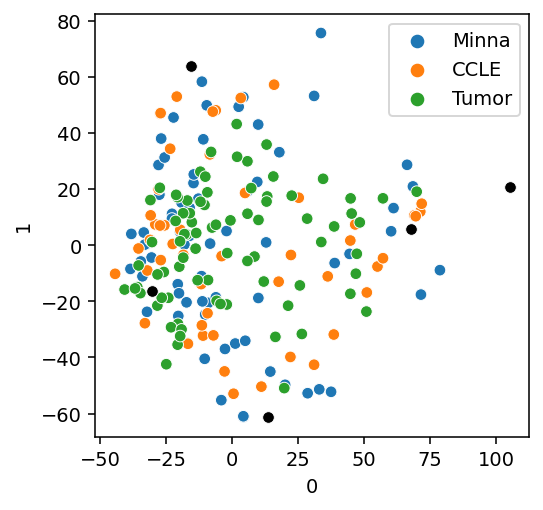

In [112]:
sns.scatterplot(pca_df[0], pca_df[1], hue = source)
arc_pca = pca.transform(arc.T)
arc_pca_df = pd.DataFrame(arc_pca, index=arc.columns)
arc_pca_df['color'] = arc.columns

sns.scatterplot(arc_pca_df[0], arc_pca_df[1], color = 'k')



/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

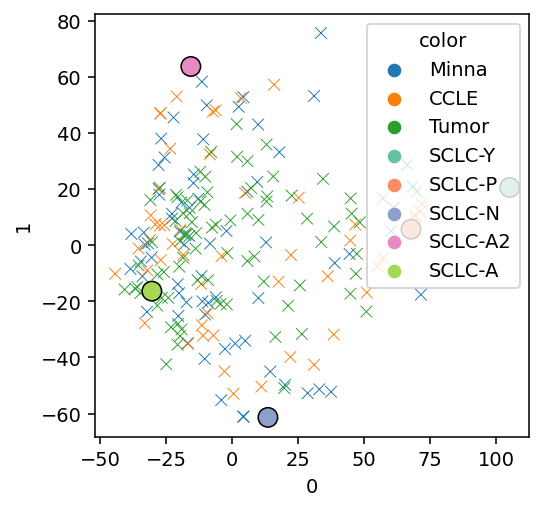

In [113]:
sns.scatterplot(pca_df[0], pca_df[1], hue = source, marker = 'x')
sns.scatterplot(arc_pca_df[0], arc_pca_df[1], hue = arc_pca_df['color'], palette='Set2', marker='o', edgecolor ='black', s = 100)

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

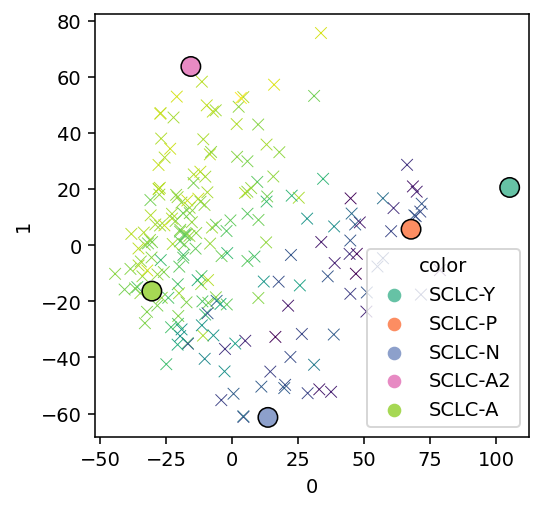

In [129]:

sns.scatterplot(pca_df[0], pca_df[1], c = data.loc['ASCL1'], marker = 'x')
sns.scatterplot(arc_pca_df[0], arc_pca_df[1], hue = arc_pca_df['color'], palette='Set2', marker='o', edgecolor ='black', s = 100)

This actually looks surprisingly good. Like, really good. Maybe we should see what happens with a PCA run only on the tumor data.

## PCA fit to tumor data only

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


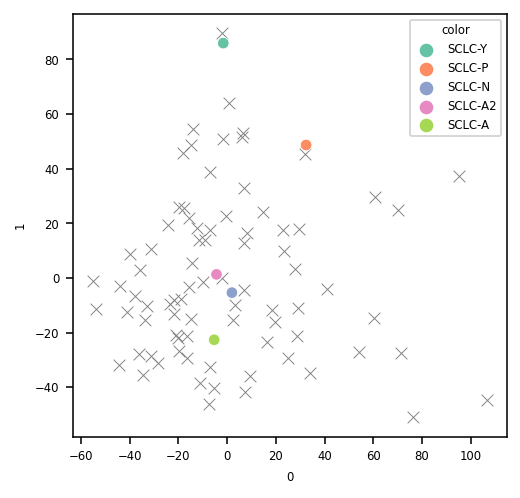

In [150]:
#fit a PCA to the combined data

tumor = data.T.loc[[i == 'Tumor' for i in source]].T

pca2 = PCA(n_components=20)
pca_df2 = pd.DataFrame(pca2.fit_transform(tumor.T))

sns.scatterplot(pca_df2[0], pca_df2[1], color ='grey', marker = 'x')

arc_pca_df2 = pd.DataFrame(pca2.transform(arc.T))


# lut = dict(zip(arc.columns.unique(), sns.color_palette('hls',5)))
# row_colors = arc.columns.map(lut)
arc_pca_df2['color'] = arc.columns

sns.scatterplot(data = arc_pca_df2, x =arc_pca_df2[0],y = arc_pca_df2[1], hue = arc_pca_df2['color'], palette='Set2', marker='o')
plt.show()

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='0'>

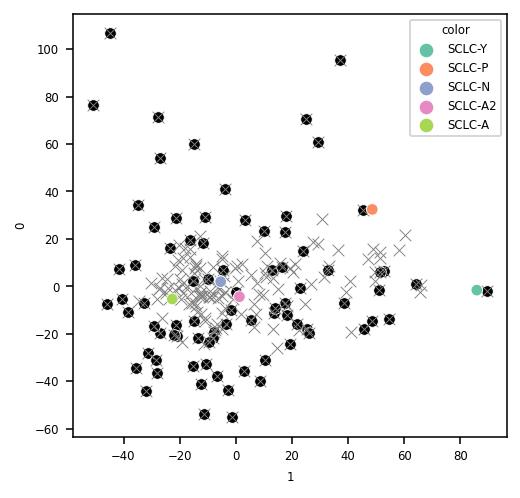

In [180]:
pca_all_df2 = pd.DataFrame(pca2.transform(data.T))
sns.scatterplot(pca_df2[1], pca_df2[0], color ='k', marker = 'o')
sns.scatterplot(pca_all_df2[1], pca_all_df2[0], color ='grey', marker = 'x')
sns.scatterplot(data = arc_pca_df2, x =arc_pca_df2[1],y = arc_pca_df2[0], hue = arc_pca_df2['color'], palette='Set2', marker='o')


/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='2'>

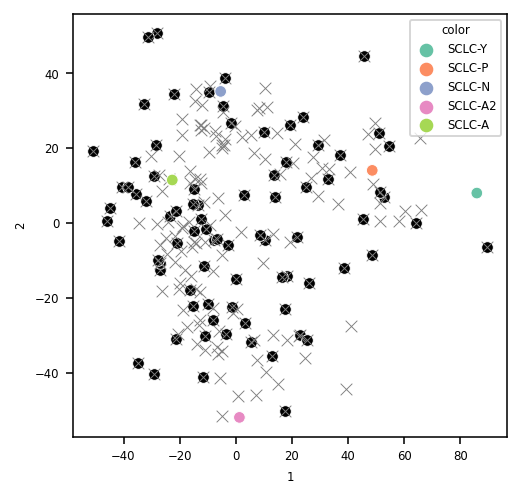

In [182]:
sns.scatterplot(pca_df2[1], pca_df2[2], color ='k', marker = 'o')
sns.scatterplot(pca_all_df2[1], pca_all_df2[2], color ='grey', marker = 'x')
sns.scatterplot(data = arc_pca_df2, x =arc_pca_df2[1],y = arc_pca_df2[2], hue = arc_pca_df2['color'], palette='Set2', marker='o')


/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

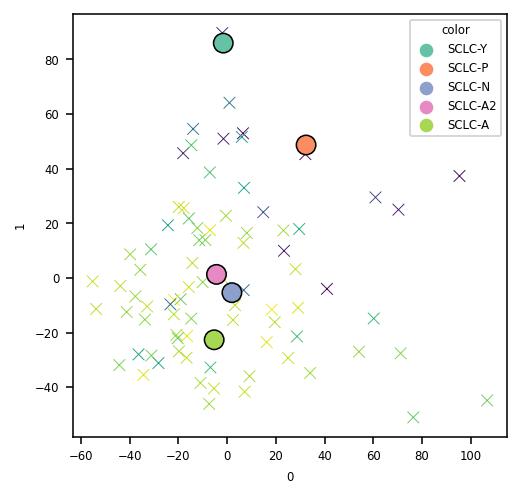

In [204]:
sns.scatterplot(pca_df2[0], pca_df2[1], c = tumor.loc['ASCL1'], marker = 'x')
sns.scatterplot(arc_pca_df2[0], arc_pca_df2[1], hue = arc_pca_df2['color'], palette='Set2', marker='o', edgecolor ='black', s = 100)

When running a PCA fit to only tumor data, we see that the second principal component looks similar to the first principal component in the combined dataset (pulling apart NE and non-NE). However, the first principal component here seems pretty unrelated to the subtypes, and does not pull out much variance from the cell lines. We can look to see if any of the PCs "match up" across the models-- i.e. PC_all 0 seems to match PC_tumor 1. 

## Comparing PCA fit to all data vs PCA fit to tumor data

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

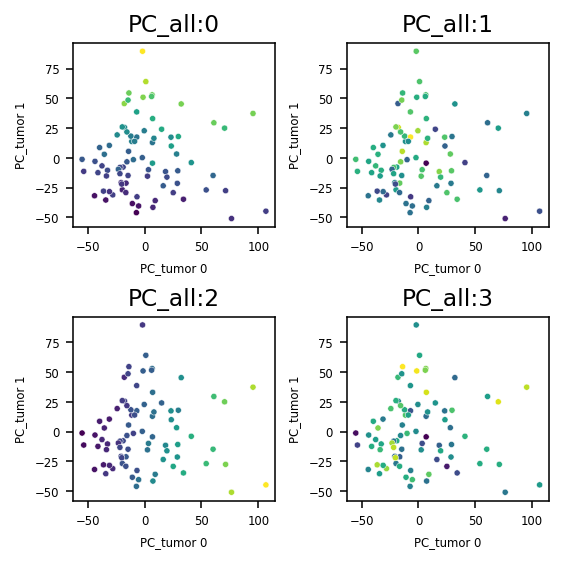

In [157]:
# plt.rcParams['axes.titlesize'] = 12
# plt.rcParams['axes.labelsize'] = 6
# plt.rcParams['axes.ticksize'] = 6

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6}

mpl.rc('font', **font)

# fig, axes = plt.subplots(2, 2)
fig = plt.figure()
for i in range(4):
    fig.add_subplot(221+i, frameon=True)

    sns.scatterplot(pca_df2[0], pca_df2[1], c = pca_df.loc[[i == 'Tumor' for i in source]][i], s = 10)
    plt.title("PC_all:" + str(i))
    plt.xlabel('PC_tumor 0')
    plt.ylabel('PC_tumor 1')
plt.tight_layout()


What these plots are showing in the tumor data in it's own PCA (i.e. the PCA was fit to the tumor data, only), colored by the location in each PCA dimension from all of the data (i.e. the PCA fit to all of the data together, above). It is now easy to see that `PC_tumor 1`  correlates almost perfectly `PC_all 0`. Similarly, `PC_tumor 0` correlates with `PC_all 2`. So `PC_all 1` is dominated by variance in the cell line data. 

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

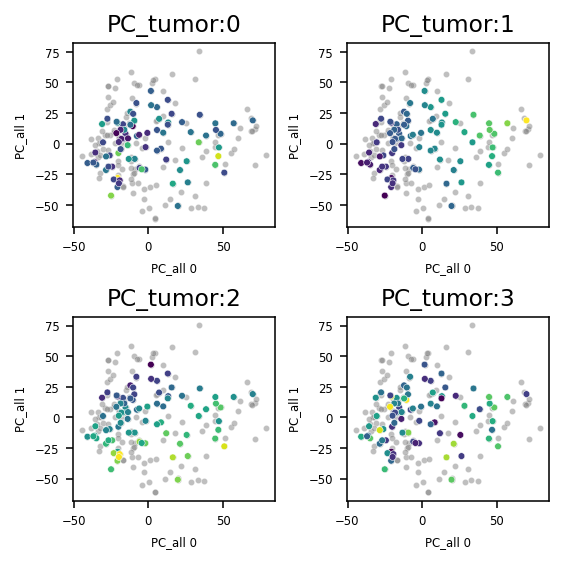

In [159]:
# fig, axes = plt.subplots(2, 2)
fig = plt.figure()
for i in range(4):
    fig.add_subplot(221+i, frameon=True)
    sns.scatterplot(pca_df[0], pca_df[1], color = 'grey', s = 10, alpha = .5)

    sns.scatterplot(pca_df.loc[[i == 'Tumor' for i in source]][0], pca_df.loc[[i == 'Tumor' for i in source]][1], c = pca_df2[i], s = 12)
    plt.title("PC_tumor:" + str(i))
    plt.xlabel('PC_all 0')
    plt.ylabel('PC_all 1')
plt.tight_layout()


Once again, we see `PC_tumor 1` correlates almost perfectly `PC_all 0` (top right plot), and `PC_tumor 2` correlates pretty well with `PC_all 1`. 

/Users/smgroves/opt/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


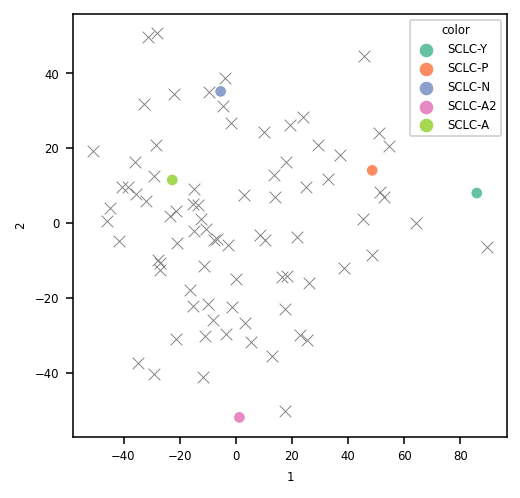

In [160]:
#fit a PCA to the combined data

tumor = data.T.loc[[i == 'Tumor' for i in source]].T

pca2 = PCA(n_components=20)
pca_df2 = pd.DataFrame(pca2.fit_transform(tumor.T))

sns.scatterplot(pca_df2[1], pca_df2[2], color ='grey', marker = 'x')

arc_pca_df2 = pd.DataFrame(pca2.transform(arc.T))


# lut = dict(zip(arc.columns.unique(), sns.color_palette('hls',5)))
# row_colors = arc.columns.map(lut)
arc_pca_df2['color'] = arc.columns

sns.scatterplot(data = arc_pca_df2, x =arc_pca_df2[1],y = arc_pca_df2[2], hue = arc_pca_df2['color'], palette='Set2', marker='o')
plt.show()

Looking at the second and third PCs of the tumor-fit model looks very similar to the first and second in the full data-fit model.

Text(0.5, 1.0, 'Percent Explained Variance by PC')

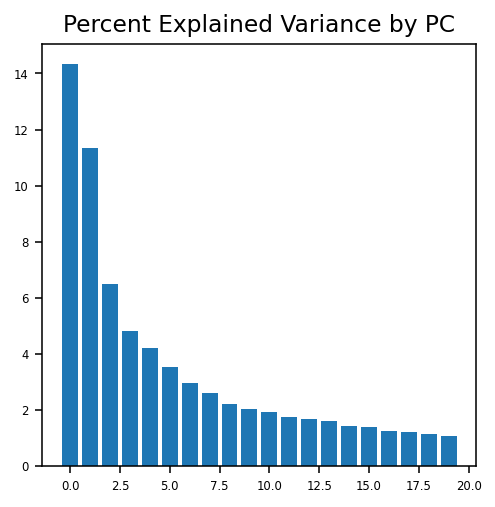

In [167]:
plt.bar(x = range(20), height = pca2.explained_variance_ratio_*100)
plt.title("Percent Explained Variance by PC")

Together, the first three PCs explain about 32% of the variance in the tumor data, and the second two (that match cell line PCs) explains about 20% of the tumor variance.

In [209]:
loadings = pd.DataFrame(pca2.components_.T, columns=[str(i) for i in range(20)], index =  tumor.index)
loadings.sort_values('0', ascending = False).head(50).index

Index(['AZGP1', 'FABP5', 'HOXC10', 'DUSP23', 'RPS29', 'PIR', 'GSTO1', 'NMU',
       'RPL12', 'PRAME', 'VIL1', 'RPL22L1', 'RPS18', 'MT1G', 'RPS7', 'RPS8',
       'RPL27A', 'RPL39', 'HPDL', 'RPL5', 'CSAG1', 'RPS12', 'POU2F3', 'RPL31',
       'GNAT3', 'EEF1B2', 'RPL35', 'HEBP2', 'RPL36A', 'RPS13', 'MS4A15',
       'RPL14', 'RPL32', 'RPS25', 'PFDN4', 'RPS15A', 'RPL27', 'VAMP8', 'RPS10',
       'RPL36', 'HIST1H4J', 'RPL19', 'RPS27A', 'LYG2', 'RPS3A', 'RPL23A',
       'RPL26', 'RPL18A', 'BMX', 'FAU'],
      dtype='object')

When we plug the first 50 genes into ENRICHR, we find that ribosomal proteins are dominating the signal for `PC_tumor 0`, and get terms like translation: https://maayanlab.cloud/Enrichr/enrich?dataset=4b6aba0cb174601e45b9a5ea6789ea43

In [208]:
loadings.sort_values('0', ascending = True).head(20).index

Index(['CLU', 'CACNA1A', 'ELN', 'MSN', 'SEZ6L', 'ASCL1', 'GRIK3', 'COL4A2',
       'SULF2', 'LDOC1', 'GRP', 'ABAT', 'PHACTR1', 'IGF2', 'SOX1', 'NNAT',
       'ATP8A2', 'CLIP3', 'PTPRS', 'SLC22A17'],
      dtype='object')

In [210]:
loadings.sort_values('1', ascending = False).head(20).index

Index(['ANXA1', 'MYC', 'ALDH1A1', 'CTSC', 'CAPG', 'S100A11', 'CNN2', 'S100A10',
       'HLA-E', 'HLA-B', 'LRMP', 'VIM', 'IFI16', 'VAMP8', 'CTSH', 'CTSZ',
       'PLBD1', 'LYN', 'IFITM3', 'RAB32'],
      dtype='object')

In [211]:
loadings.sort_values('1', ascending = True).head(20).index

Index(['GRP', 'ASCL1', 'TAGLN3', 'DDC', 'SCGN', 'EEF1A2', 'ISL1', 'CHGA',
       'SCG2', 'DNER', 'PCSK2', 'INSM1', 'KCNMB2', 'SOX1', 'SYT4', 'DLK1',
       'SYT13', 'SCG3', 'FOXG1', 'DUSP26'],
      dtype='object')

As expected, `PC_tumor 1` is dominated by NE vs non-NE related genes, like ASCL1 and GRP vs ANXA1 and VIM.

In [212]:
loadings.sort_values('2', ascending = False).head(20).index

Index(['NHLH1', 'NELL2', 'NPTX2', 'EBF3', 'SOX9', 'SLC17A6', 'NHLH2', 'GAS2',
       'SOX11', 'SCHIP1', 'NEUROD1', 'NUDT11', 'PRKX', 'CTNND2', 'RBP7',
       'COL9A3', 'FNDC5', 'GNG8', 'TEAD2', 'SMO'],
      dtype='object')

In [213]:
loadings.sort_values('2', ascending = True).head(20).index

Index(['GRP', 'CEACAM5', 'TFF3', 'ASCL1', 'FOXA2', 'SCG2', 'FAM3B', 'SCGN',
       'LCN15', 'TSPAN1', 'SCNN1A', 'SCIN', 'SCN3A', 'SLC35D3', 'GJB1',
       'NELL1', 'DDC', 'NR0B2', 'TMEM176A', 'TSPAN8'],
      dtype='object')

Also as expected, `PC_tumor 2` pulls apart A, A2, and N subtypes, with NEUROD1 genes negatively correlated and ASCL1 genes (particularly A2 genes) having high positive loadings.